In [2]:
import pandas as pd
import datetime as datetime, time
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

In [3]:
#Cargue de la base de datos
betdataset=pd.read_parquet('../data/processed/nuevacolumna_betdataset.parquet')

In [4]:
#Columnas
betdataset.columns

Index(['Username', 'Bet', 'CashedOut', 'Bonus', 'Profit', 'BustedAt',
       'PlayDate', 'Result'],
      dtype='object')

In [5]:
#Suma de todo el profit
suma_positivos = betdataset[betdataset['Profit'] > 0]['Profit'].sum()
suma_positivos

np.float64(44100139.26999999)

In [6]:
#Base de datos solo con los profit
betdataset[betdataset['Profit'] > 0]

,Username,Bet,CashedOut,Bonus,Profit,BustedAt,PlayDate,Result
0,papai,5,1.20,0.000,1.00,8.24,2016-11-20 19:44:19+00:00,1
2,rrrrrrrr,4,1.33,0.030,1.44,3.15,2016-11-23 06:39:15+00:00,1
4,ADM,50,1.50,0.014,25.70,2.29,2016-11-27 08:14:48+00:00,1
6,charles150,1,1.05,0.040,0.09,1.05,2016-11-14 18:52:58+00:00,1
8,fluxxy,2000,1.20,0.000,400.00,9.14,2016-11-23 00:26:05+00:00,1
...,...,...,...,...,...,...,...,...
49992,N1ndy,10,1.50,0.000,5.00,2.86,2016-11-18 04:46:56+00:00,1
49993,tatiana31,79,1.10,0.000,7.90,1.51,2016-11-29 12:52:43+00:00,1
49996,Sandboxx,3000,1.04,0.000,120.00,5.03,2016-11-02 19:01:58+00:00,1
49998,ugneri,68,1.33,0.000,22.44,19.00,2016-11-30 12:29:56+00:00,1


In [7]:
#Profit solo la columna
betdataset[betdataset['Profit'] > 0]['Profit']

0          1.00
2          1.44
4         25.70
6          0.09
8        400.00
          ...  
49992      5.00
49993      7.90
49996    120.00
49998     22.44
49999     90.00
Name: Profit, Length: 28685, dtype: float64

In [8]:
#Suma de pérdidas
suma_negativos = betdataset[betdataset['Profit'] < 0]['Profit'].sum()
suma_negativos

np.float64(-41813021.0)

In [9]:
#Suma de toda la columna
betdataset['Profit'].sum()

np.float64(2287118.27)

In [10]:
#Ordenamos por P&L
betdataset_sorted = betdataset.sort_values(by='Profit', ascending=False)
betdataset_sorted

,Username,Bet,CashedOut,Bonus,Profit,BustedAt,PlayDate,Result
3570,goosin2000,550000,3.10,0.0382,1175993.10,3.60,2016-11-21 14:39:56+00:00,1
17735,GPL89,475000,3.31,0.0148,1104277.04,5.50,2016-11-09 14:14:43+00:00,1
39293,allg1124,1000000,2.00,0.0115,1011494.44,2.48,2016-11-18 04:31:48+00:00,1
22379,Alexy,1000000,1.94,0.0113,951253.33,5.02,2016-12-06 17:46:15+00:00,1
14281,GPL89,500000,2.53,0.0126,771282.37,12.41,2016-11-03 21:16:41+00:00,1
...,...,...,...,...,...,...,...,...
43113,Chelashin,641024,0.00,0.0000,-641024.00,1.10,2016-12-01 07:26:41+00:00,0
13805,inside,969000,0.00,0.0000,-969000.00,1.93,2016-11-02 12:34:41+00:00,0
31231,Jlau,1000000,0.00,0.0000,-1000000.00,1.04,2016-11-11 03:28:36+00:00,0
48121,Alexy,1000000,0.00,0.0000,-1000000.00,1.40,2016-12-02 00:14:30+00:00,0


In [11]:
#El que más perdió
betdataset.groupby('Username')['Profit'].sum().sort_values(ascending=True)

Username
Alexy          -1465227.51
inside         -1245000.00
Jlau           -1072222.00
period          -845423.55
maras           -752148.77
                   ...    
sce919           596856.84
rapidfireman     932131.31
goosin2000      1544213.87
GPL89           1875559.41
allg1124        3182621.34
Name: Profit, Length: 4149, dtype: float64

In [12]:
#El que más ganó
betdataset.groupby('Username')['Profit'].sum().sort_values(ascending=False)

Username
allg1124        3182621.34
GPL89           1875559.41
goosin2000      1544213.87
rapidfireman     932131.31
sce919           596856.84
                   ...    
maras           -752148.77
period          -845423.55
Jlau           -1072222.00
inside         -1245000.00
Alexy          -1465227.51
Name: Profit, Length: 4149, dtype: float64

In [13]:
#Profit del ganador del chashout más alto
betdataset.groupby('Username')['Profit'].sum().loc['standy89']

np.float64(4491.93)

In [14]:
#El más ganador: Cuánto apostó, cuánto ganó y cuántas veces ganó
betdataset.query("Username=='allg1124'")[['Bet','Profit','Result']].sum()

Bet       16262350.00
Profit     3182621.34
Result          74.00
dtype: float64

In [15]:
# % de victorias
betdataset.query("Username=='allg1124'")[['Result']].sum()/betdataset.query("Username=='allg1124'")[['Result']].shape[0]

Result    0.732673
dtype: float64

In [16]:
#Máxima bet
MaxCO = betdataset['Bet'].idxmax()
MaxCO

10102

In [17]:
#Ubicación de máxima bet
betdataset.loc[MaxCO]


Username                  rapidfireman
Bet                            1000000
CashedOut                          1.7
Bonus                           0.0105
Profit                       710523.52
BustedAt                          4.35
PlayDate     2016-12-04 17:37:27+00:00
Result                               1
Name: 10102, dtype: object

**Analisis semanal**

In [18]:
#Día de la semana de cada registro
semana=betdataset['PlayDate'].dt.day_name()
semana

0           Sunday
1           Monday
2        Wednesday
3         Thursday
4           Sunday
           ...    
49995       Friday
49996    Wednesday
49997      Tuesday
49998    Wednesday
49999       Monday
Name: PlayDate, Length: 50000, dtype: object

In [19]:
#Uniendo el profit a los días por medio del índice
merged_series = pd.merge(betdataset['Profit'], betdataset['PlayDate'].dt.day_name(), left_index=True, right_index=True, how='inner')
merged_series

,Profit,PlayDate
0,1.00,Sunday
1,-3.00,Monday
2,1.44,Wednesday
3,-10.00,Thursday
4,25.70,Sunday
...,...,...
49995,-4.00,Friday
49996,120.00,Wednesday
49997,-1.00,Tuesday
49998,22.44,Wednesday


In [20]:
#Agrupamiento por día de semana
week=merged_series.groupby('PlayDate')['Profit'].sum()
week

PlayDate
Friday       1790702.04
Monday        799176.20
Saturday     -666970.81
Sunday        675940.22
Thursday      754321.80
Tuesday      1775143.68
Wednesday   -2841194.86
Name: Profit, dtype: float64

In [21]:
#Ordenando los días
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
profit_por_dia = week.reindex(ordered_days, fill_value=0)

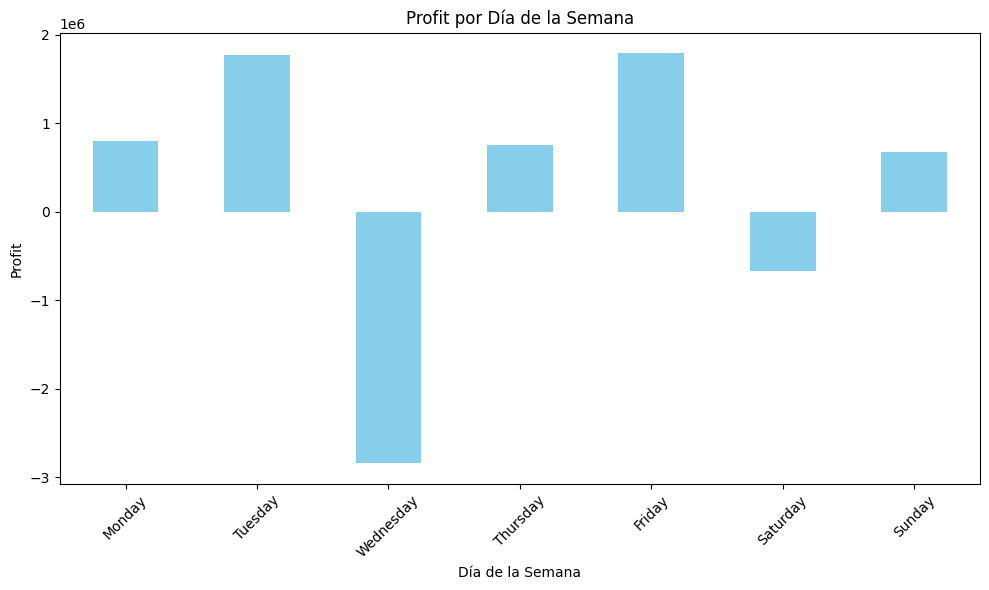

In [22]:
# Gráfica de los resultados
plt.figure(figsize=(10, 6))
profit_por_dia.plot(kind='bar', color='skyblue')
plt.title('Profit por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
#betdataset['Semana'] = betdataset['PlayDate'].dt.day_name()

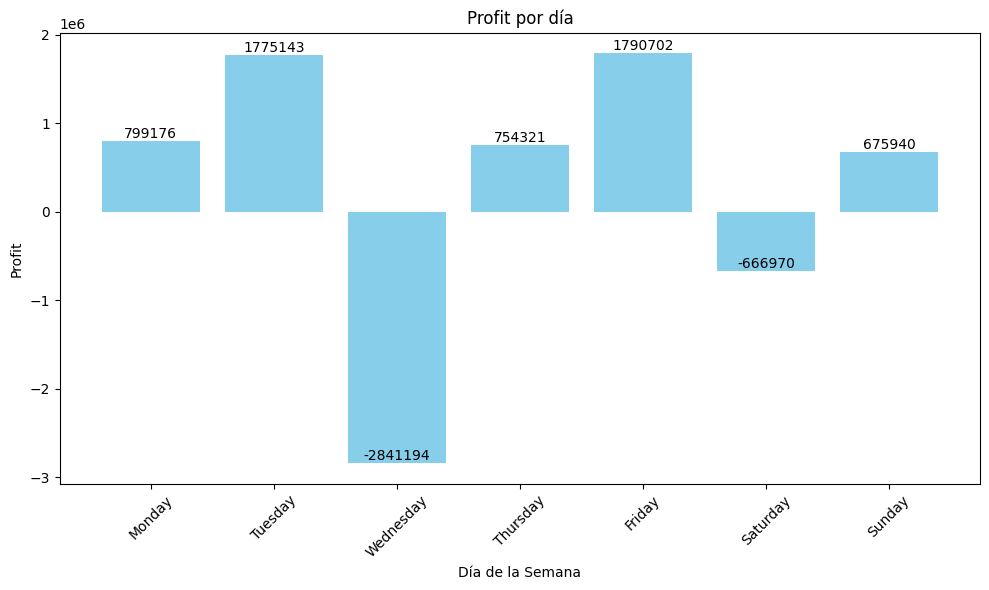

In [23]:
plt.figure(figsize=(10, 6))
bars = plt.bar(profit_por_dia.index, profit_por_dia.values, color='skyblue')

# Agregar etiquetas en cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.title('Profit por día')
plt.xlabel('Día de la Semana')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
#Registro por mes
mes = betdataset['PlayDate'].dt.month_name()
mes

0        November
1        November
2        November
3        December
4        November
           ...   
49995    December
49996    November
49997    November
49998    November
49999    November
Name: PlayDate, Length: 50000, dtype: object

In [25]:
#Profit y mes
profitandmonth = pd.merge(betdataset['Profit'], betdataset['PlayDate'].dt.month_name(), left_index=True, right_index=True, how='inner')
profitandmonth

,Profit,PlayDate
0,1.00,November
1,-3.00,November
2,1.44,November
3,-10.00,December
4,25.70,November
...,...,...
49995,-4.00,December
49996,120.00,November
49997,-1.00,November
49998,22.44,November


In [26]:
#Agrupamiento por mes
profitbymonth=profitandmonth.groupby('PlayDate')['Profit'].sum()
profitbymonth

PlayDate
December     160691.04
November    2361082.78
October     -234655.55
Name: Profit, dtype: float64

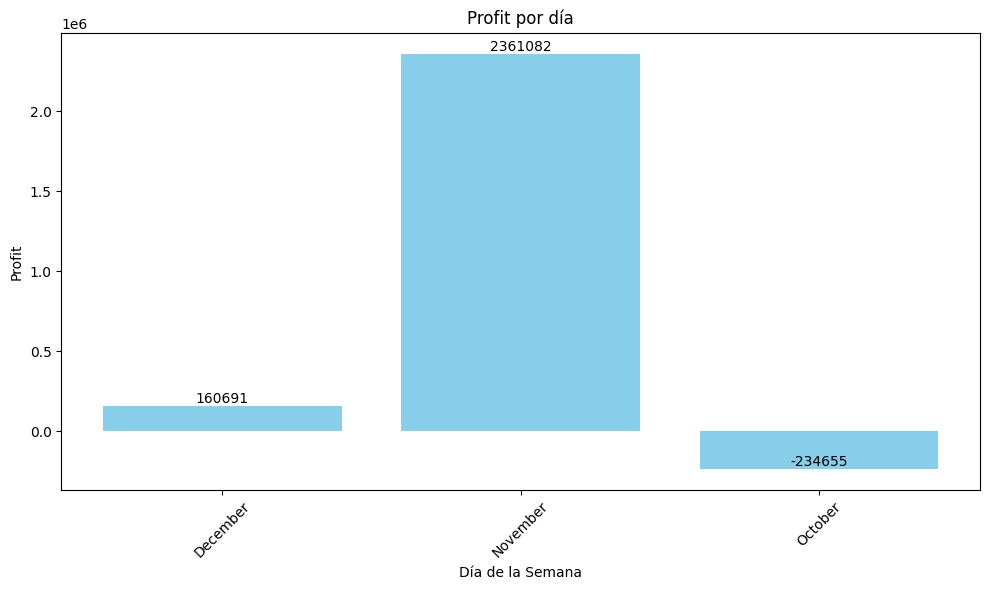

In [27]:
#Gráfica
plt.figure(figsize=(10, 6))
bars = plt.bar(profitbymonth.index, profitbymonth.values, color='skyblue')

# Agregar etiquetas en cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.title('Profit por día')
plt.xlabel('Día de la Semana')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [28]:
#Registro por hora del día
hora = betdataset['PlayDate'].dt.hour
hora

0        19
1        14
2         6
3        18
4         8
         ..
49995     5
49996    19
49997    23
49998    12
49999    20
Name: PlayDate, Length: 50000, dtype: int32

In [29]:
#Hora y profit
unirhora = pd.merge(betdataset['Profit'], hora, left_index=True, right_index=True, how='inner')
unirhora

,Profit,PlayDate
0,1.00,19
1,-3.00,14
2,1.44,6
3,-10.00,18
4,25.70,8
...,...,...
49995,-4.00,5
49996,120.00,19
49997,-1.00,23
49998,22.44,12


In [30]:
#Agrupamiento de hora del día y profit
profitbyhour=unirhora.groupby('PlayDate')['Profit'].sum()
profitbyhour

PlayDate
0    -2490148.25
1      428045.96
2     -449886.81
3    -2673631.71
4     1610287.75
5      -10829.12
6     1383509.60
7    -1550688.84
8     -786425.22
9     -101877.20
10    1285277.33
11     194295.99
12   -1293609.58
13   -1030303.64
14    2385182.39
15     -36695.03
16    -358118.73
17    1827760.47
18     343390.18
19     532133.23
20     752963.31
21     829128.72
22    1123538.97
23     373818.50
Name: Profit, dtype: float64

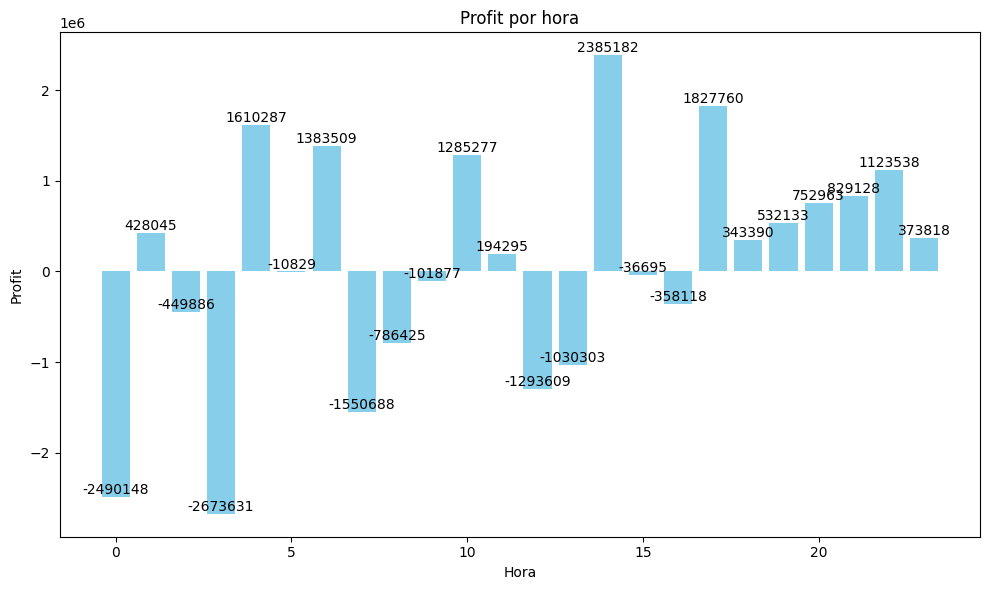

In [31]:
#Gráfica por hora
plt.figure(figsize=(10, 6))
bars = plt.bar(profitbyhour.index, profitbyhour.values, color='skyblue')

# Agregar etiquetas en cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.title('Profit por hora')
plt.xlabel('Hora')
plt.ylabel('Profit')
#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

(array([17106., 17113., 17120., 17127., 17136., 17143.]),
 [Text(17106.0, 0, '2016-11-01'),
  Text(17113.0, 0, '2016-11-08'),
  Text(17120.0, 0, '2016-11-15'),
  Text(17127.0, 0, '2016-11-22'),
  Text(17136.0, 0, '2016-12-01'),
  Text(17143.0, 0, '2016-12-08')])

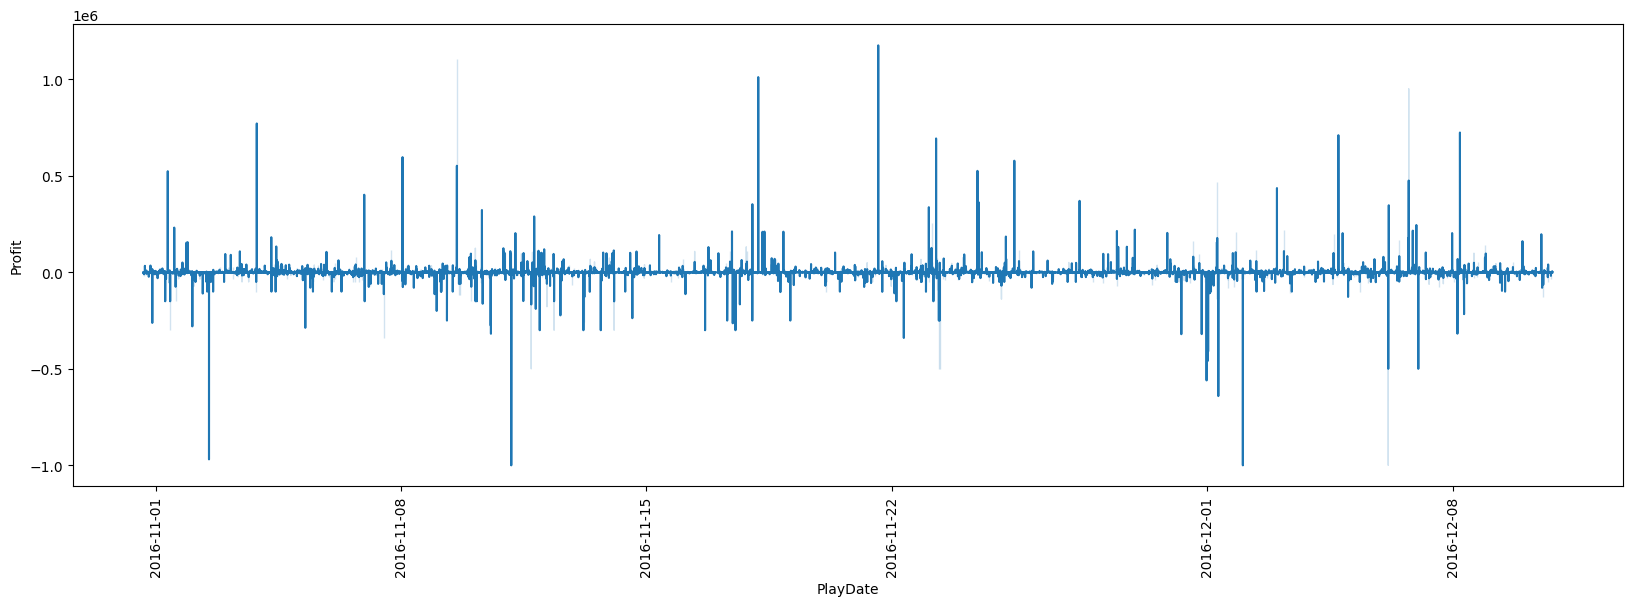

In [32]:
#Serie de tiempo
plt.figure(figsize=(20, 6))
sns.lineplot(data=betdataset, x="PlayDate", y="Profit")#, hue="ID")
plt.xticks(rotation=90)

In [33]:
#Variables numéricas
cuantitativos=betdataset.columns.drop(['Username',  'PlayDate'])
cuantitativos

Index(['Bet', 'CashedOut', 'Bonus', 'Profit', 'BustedAt', 'Result'], dtype='object')

In [34]:
df_cuantitativo = betdataset[cuantitativos].apply(lambda x: x)
df_cuantitativo 

,Bet,CashedOut,Bonus,Profit,BustedAt,Result
0,5,1.20,0.000,1.00,8.24,1
1,3,0.00,0.000,-3.00,1.40,0
2,4,1.33,0.030,1.44,3.15,1
3,10,0.00,0.000,-10.00,1.63,0
4,50,1.50,0.014,25.70,2.29,1
...,...,...,...,...,...,...
49995,4,0.00,0.000,-4.00,4.80,0
49996,3000,1.04,0.000,120.00,5.03,1
49997,1,0.00,0.000,-1.00,1.06,0
49998,68,1.33,0.000,22.44,19.00,1


In [35]:
#Se crea un dataframe con las variables numéricas
df_cuantitativos=pd.DataFrame()
for i in cuantitativos:
    df_cuantitativos[i]=betdataset[i]
df_cuantitativos

,Bet,CashedOut,Bonus,Profit,BustedAt,Result
0,5,1.20,0.000,1.00,8.24,1
1,3,0.00,0.000,-3.00,1.40,0
2,4,1.33,0.030,1.44,3.15,1
3,10,0.00,0.000,-10.00,1.63,0
4,50,1.50,0.014,25.70,2.29,1
...,...,...,...,...,...,...
49995,4,0.00,0.000,-4.00,4.80,0
49996,3000,1.04,0.000,120.00,5.03,1
49997,1,0.00,0.000,-1.00,1.06,0
49998,68,1.33,0.000,22.44,19.00,1


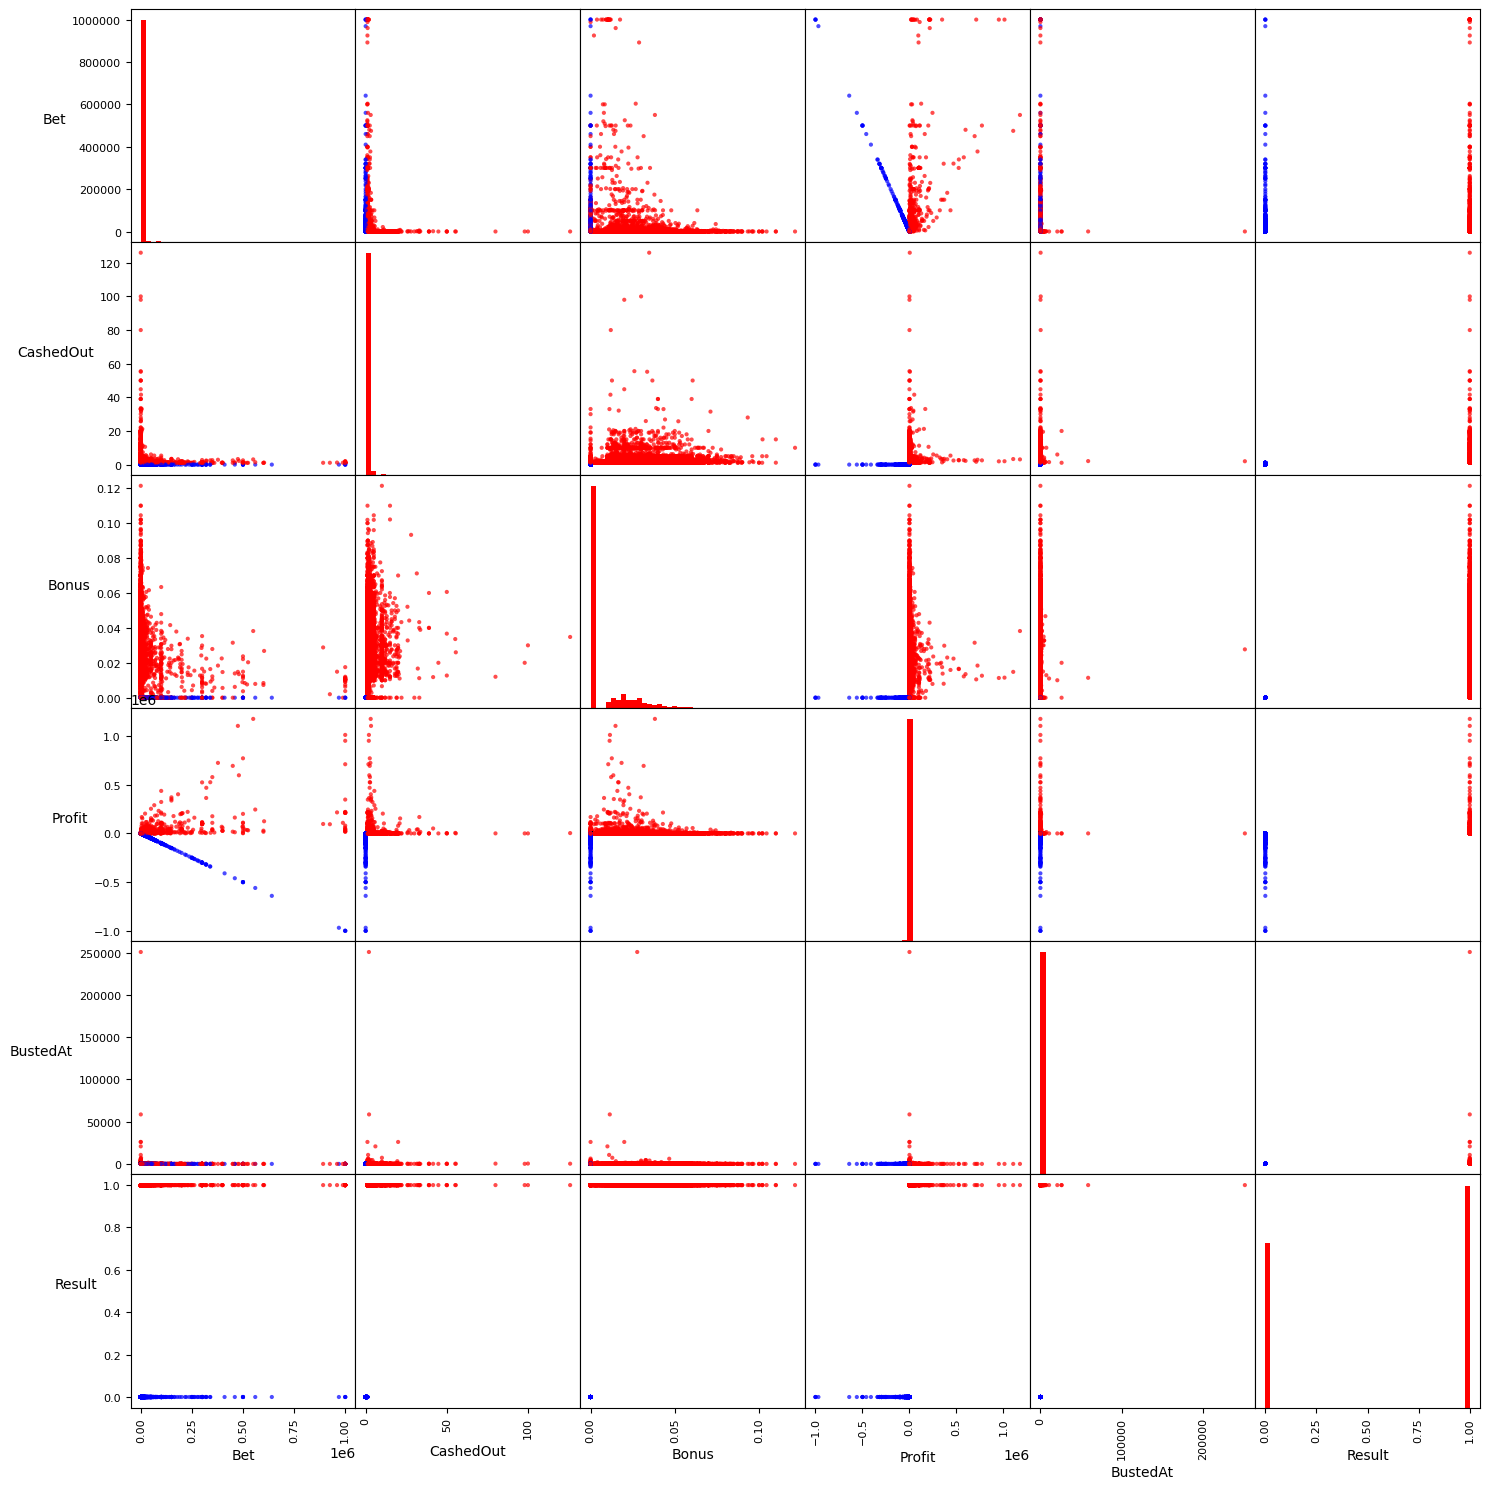

In [45]:
# Grafica de dispersión e histograma
colorsd = df_cuantitativos['Result'].map({1: 'red', 0: 'blue'})
axesd=pd.plotting.scatter_matrix(df_cuantitativos, alpha=0.7, figsize=(15,15), range_padding = 0.1, diagonal='hist',
                           c = colorsd, hist_kwds = {'bins':40, 'color':'red'})

for ax in axesd.flatten():
    ax.xaxis.label.set_rotation(0)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

C:\Users\andre\AppData\Local\Temp\ipykernel_23700\2886246127.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = betdataset[cuantitativos[i]], linewidth = 3, palette="Set2", fliersize = 3)
C:\Users\andre\AppData\Local\Temp\ipykernel_23700\2886246127.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = betdataset[cuantitativos[i]], linewidth = 3, palette="Set2", fliersize = 3)
C:\Users\andre\AppData\Local\Temp\ipykernel_23700\2886246127.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = betdataset[cuantitativos[i]], linew

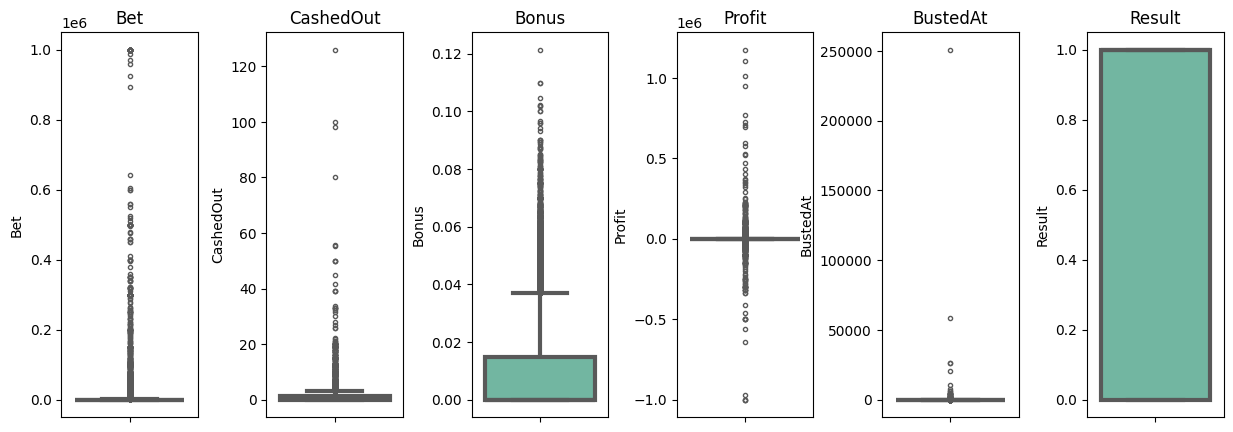

In [46]:
#Independizamos cada boxplot en su propia escala
plt.figure(figsize=(15, 5))
for i in range (len(cuantitativos)):
    plt.subplot(1, 6, i+1)
    sns.boxplot(data = betdataset[cuantitativos[i]], linewidth = 3, palette="Set2", fliersize = 3)
    plt.title(cuantitativos[i])
plt.subplots_adjust(wspace=0.5)

<Axes: >

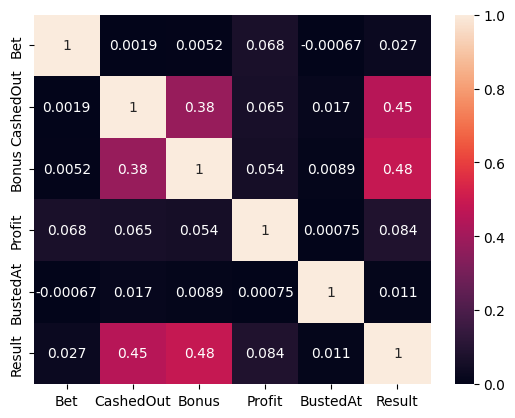

In [34]:
#Matriz de correlación
sns.heatmap(df_cuantitativos.corr(), annot=True)

In [36]:
clust_groupby=pd.merge(betdataset['Username'], df_cuantitativos, left_index=True, right_index=True, how='inner').rename(columns={'Username':'Usercode'})
clust_groupby

,Usercode,Bet,CashedOut,Bonus,Profit,BustedAt,Result
0,papai,5,1.20,0.000,1.00,8.24,1
1,znay22,3,0.00,0.000,-3.00,1.40,0
2,rrrrrrrr,4,1.33,0.030,1.44,3.15,1
3,sanya1206,10,0.00,0.000,-10.00,1.63,0
4,ADM,50,1.50,0.014,25.70,2.29,1
...,...,...,...,...,...,...,...
49995,ElenaV,4,0.00,0.000,-4.00,4.80,0
49996,Sandboxx,3000,1.04,0.000,120.00,5.03,1
49997,Ferreck,1,0.00,0.000,-1.00,1.06,0
49998,ugneri,68,1.33,0.000,22.44,19.00,1


In [37]:
clustertest=clust_groupby.groupby('Usercode').agg({'Bet':'mean','CashedOut':'mean','Bonus':'mean','Profit':'sum','BustedAt':'mean','Result':'sum'}).reset_index()
clustertest

,Usercode,Bet,CashedOut,Bonus,Profit,BustedAt,Result
0,----------------,10.333333,0.673333,0.013667,-7.30,1.790000,2
1,--dilib--,210.750000,0.517500,0.008125,-867.63,3.020000,2
2,-31337-,32.500000,0.950000,0.000000,-33.50,36.630000,3
3,-Nothing-,322.876923,0.919385,0.011402,-3120.69,2.702615,42
4,-Tachyon,1024.800000,0.978000,0.022200,-1494.32,1.696000,4
...,...,...,...,...,...,...,...
4144,zuko,500.000000,0.000000,0.000000,-500.00,1.630000,0
4145,zum,101.500000,1.430000,0.056700,108.64,4.065000,2
4146,zviadits,25.509434,1.005660,0.007247,-260.56,6.976226,47
4147,zzanggu,3902.161290,0.196129,0.001652,-84003.04,3.712581,2


In [38]:
clustertest.to_parquet('../data/processed/analisis_exploratorio4.parquet')

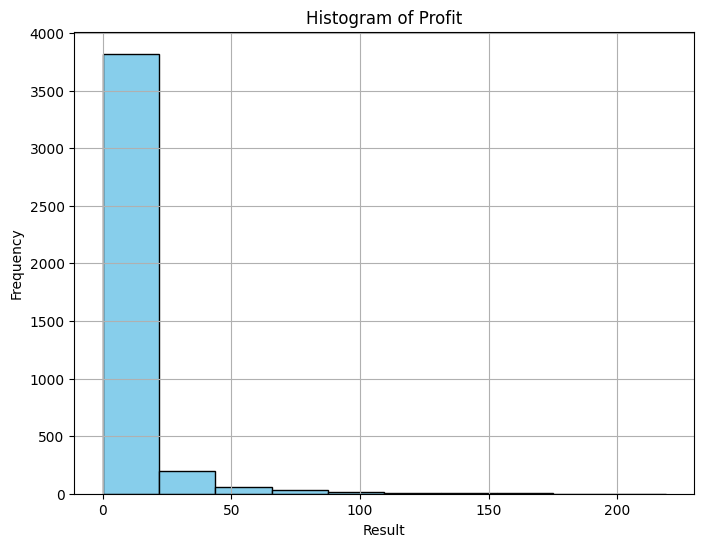

In [62]:
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
plt.hist(clustertest['Result'], bins=10, color='skyblue', edgecolor='black')  # Especificar número de bins y colores
plt.xlabel('Result')  # Etiqueta del eje x
plt.ylabel('Frequency')  # Etiqueta del eje y
plt.title('Histogram of Profit')  # Título del gráfico
plt.grid(True)  # Mostrar cuadrícula
plt.show()  # Mostrar el gráfico

In [60]:
clustertest['Result'].max()

np.int64(219)

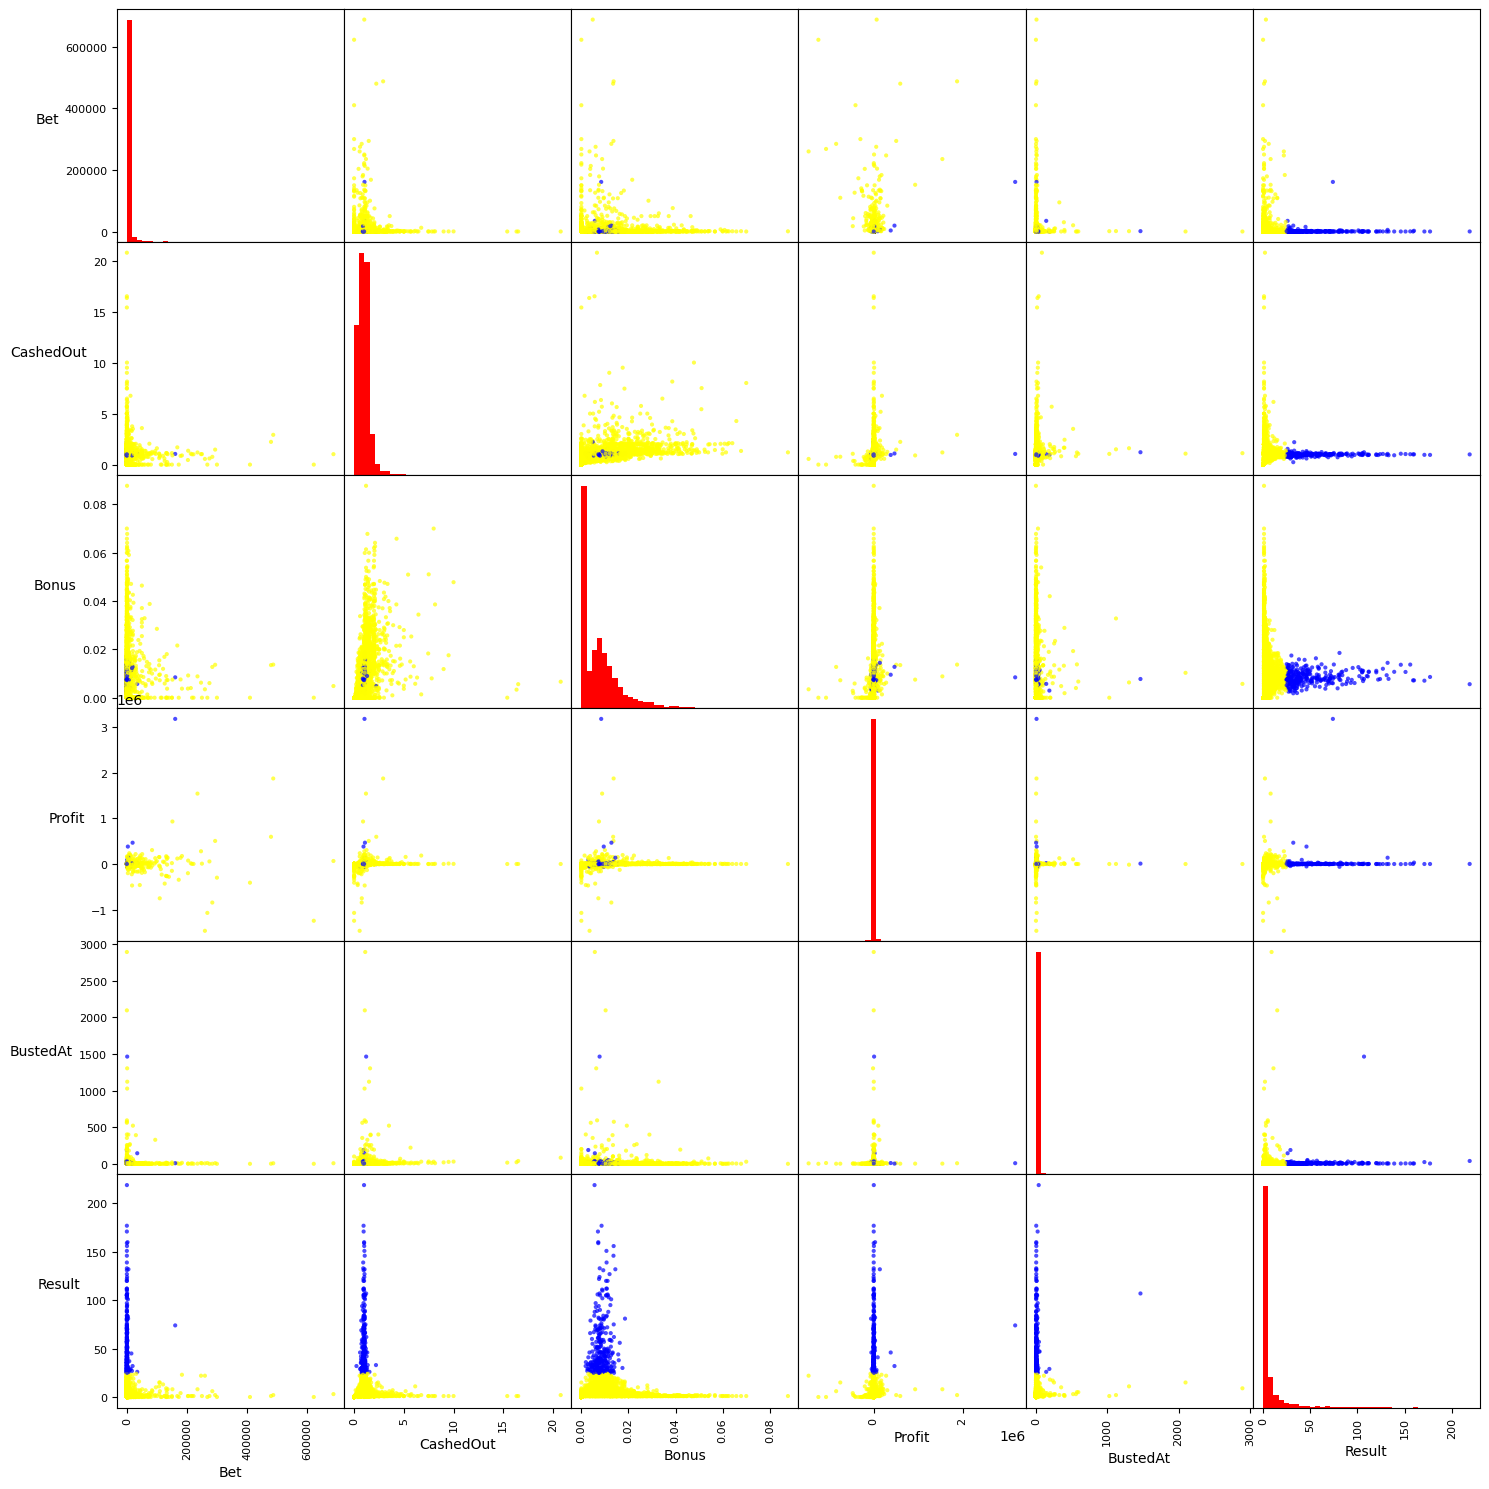

In [65]:
# Grafica de dispersión e histograma con variables dummies con la variable de salida dibujada
colorsd = clustertest['Result'].apply(lambda x: 'yellow' if x < 25 else 'blue')
#colorsd = clustertest['Profit'].map({clustertest['Profit']<0: 'red', clustertest['Profit']>0: 'blue'})
axesd=pd.plotting.scatter_matrix(clustertest, alpha=0.7, figsize=(15,15), range_padding = 0.1, diagonal='hist', c=colorsd,
                            hist_kwds = {'bins':40, 'color':'red'})

for ax in axesd.flatten():
    ax.xaxis.label.set_rotation(0)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

In [37]:
#Normalización
scaler = MinMaxScaler()
escal_gb=scaler.fit_transform(clustertest[['Bet', 'CashedOut', 'Bonus', 'Profit', 'BustedAt', 'Result']])
df_escalado_gb = pd.DataFrame(escal_gb, columns=['Bet', 'CashedOut', 'Bonus', 'Profit', 'BustedAt', 'Result'])
df_escalado_gb

,Bet,CashedOut,Bonus,Profit,BustedAt,Result
0,0.000014,0.032415,0.155834,0.315247,0.000619,0.009132
1,0.000305,0.024913,0.092645,0.315062,0.001044,0.009132
2,0.000046,0.045734,0.000000,0.315241,0.012657,0.013699
3,0.000468,0.044260,0.130006,0.314577,0.000934,0.191781
4,0.001488,0.047081,0.253136,0.314927,0.000586,0.018265
...,...,...,...,...,...,...
4144,0.000725,0.000000,0.000000,0.315141,0.000563,0.000000
4145,0.000146,0.068841,0.646522,0.315272,0.001405,0.009132
4146,0.000036,0.048413,0.082636,0.315192,0.002411,0.214612
4147,0.005670,0.009442,0.018833,0.297175,0.001283,0.009132


In [38]:
df_escalado_gb=pd.merge(clustertest['Usercode'], df_escalado_gb, left_index=True, right_index=True, how='inner')
df_escalado_gb

,Usercode,Bet,CashedOut,Bonus,Profit,BustedAt,Result
0,----------------,0.000014,0.032415,0.155834,0.315247,0.000619,0.009132
1,--dilib--,0.000305,0.024913,0.092645,0.315062,0.001044,0.009132
2,-31337-,0.000046,0.045734,0.000000,0.315241,0.012657,0.013699
3,-Nothing-,0.000468,0.044260,0.130006,0.314577,0.000934,0.191781
4,-Tachyon,0.001488,0.047081,0.253136,0.314927,0.000586,0.018265
...,...,...,...,...,...,...,...
4144,zuko,0.000725,0.000000,0.000000,0.315141,0.000563,0.000000
4145,zum,0.000146,0.068841,0.646522,0.315272,0.001405,0.009132
4146,zviadits,0.000036,0.048413,0.082636,0.315192,0.002411,0.214612
4147,zzanggu,0.005670,0.009442,0.018833,0.297175,0.001283,0.009132


## Transformar a numéricos

In [39]:
user=pd.DataFrame(betdataset['Username'])
user

,Username
0,papai
1,znay22
2,rrrrrrrr
3,sanya1206
4,ADM
...,...
49995,ElenaV
49996,Sandboxx
49997,Ferreck
49998,ugneri


In [40]:
user.query('Username=="papai"')

,Username
0,papai
5586,papai
9913,papai
12661,papai
16084,papai
18727,papai
19800,papai
21531,papai
25349,papai
33144,papai


In [41]:
LE = defaultdict(LabelEncoder)
data_LE = user.apply(lambda x: LE[x.name].fit_transform(x))
display(data_LE)

,Username
0,3358
1,4138
2,3532
3,3569
4,75
...,...
49995,550
49996,1518
49997,599
49998,3905


In [42]:
data_LE.query('Username==3358')

,Username
0,3358
5586,3358
9913,3358
12661,3358
16084,3358
18727,3358
19800,3358
21531,3358
25349,3358
33144,3358


In [43]:
clientesnumericos = pd.merge(user['Username'], data_LE, left_index=True, right_index=True, how='inner').rename(columns={'Username_x':'Username','Username_y':'Usercode'})
clientesnumericos

,Username,Usercode
0,papai,3358
1,znay22,4138
2,rrrrrrrr,3532
3,sanya1206,3569
4,ADM,75
...,...,...
49995,ElenaV,550
49996,Sandboxx,1518
49997,Ferreck,599
49998,ugneri,3905


In [44]:
before_norm=pd.merge(data_LE['Username'], df_cuantitativos, left_index=True, right_index=True, how='inner').rename(columns={'Username':'Usercode'})
before_norm

,Usercode,Bet,CashedOut,Bonus,Profit,BustedAt,Result
0,3358,5,1.20,0.000,1.00,8.24,1
1,4138,3,0.00,0.000,-3.00,1.40,0
2,3532,4,1.33,0.030,1.44,3.15,1
3,3569,10,0.00,0.000,-10.00,1.63,0
4,75,50,1.50,0.014,25.70,2.29,1
...,...,...,...,...,...,...,...
49995,550,4,0.00,0.000,-4.00,4.80,0
49996,1518,3000,1.04,0.000,120.00,5.03,1
49997,599,1,0.00,0.000,-1.00,1.06,0
49998,3905,68,1.33,0.000,22.44,19.00,1


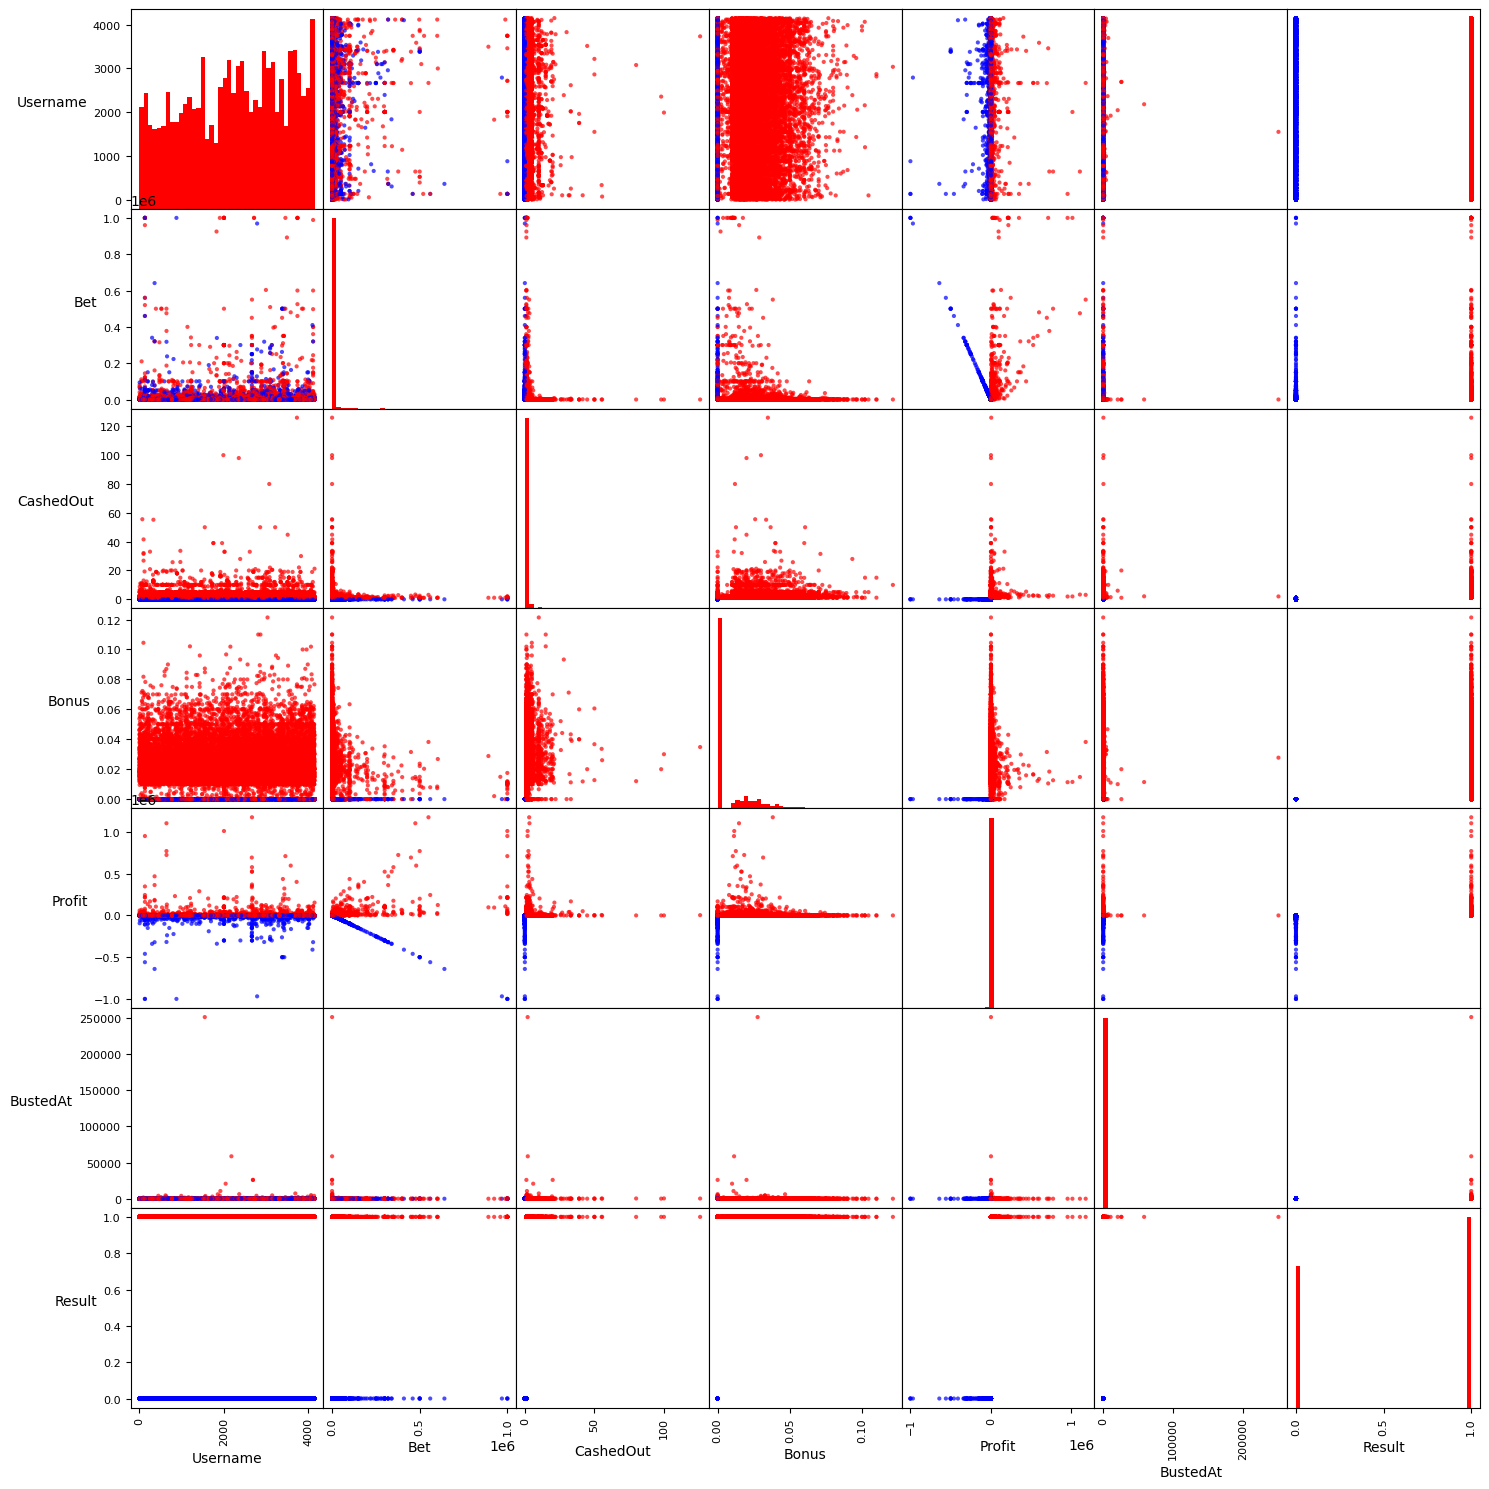

In [ ]:
# Grafica de dispersión e histograma con variables dummies con la variable de salida dibujada
colorsd = before_norm['Result'].map({1: 'red', 0: 'blue'})
axesd=pd.plotting.scatter_matrix(before_norm, alpha=0.7, figsize=(15,15), range_padding = 0.1, diagonal='hist',
                           c = colorsd, hist_kwds = {'bins':40, 'color':'red'})

for ax in axesd.flatten():
    ax.xaxis.label.set_rotation(0)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

In [45]:
#Normalización
scaler = MinMaxScaler()
escaladaswithuser=scaler.fit_transform(before_norm)
df_escaladowithuser = pd.DataFrame(escaladaswithuser, columns=before_norm.columns)
df_escaladowithuser

,Usercode,Bet,CashedOut,Bonus,Profit,BustedAt,Result
0,0.809547,0.000004,0.009524,0.000000,0.459561,0.000033,1.0
1,0.997589,0.000002,0.000000,0.000000,0.459559,0.000006,0.0
2,0.851495,0.000003,0.010556,0.247117,0.459561,0.000013,1.0
3,0.860415,0.000009,0.000000,0.000000,0.459556,0.000006,0.0
4,0.018081,0.000049,0.011905,0.115321,0.459572,0.000009,1.0
...,...,...,...,...,...,...,...
49995,0.132594,0.000003,0.000000,0.000000,0.459558,0.000019,0.0
49996,0.365959,0.002999,0.008254,0.000000,0.459615,0.000020,1.0
49997,0.144407,0.000000,0.000000,0.000000,0.459560,0.000004,0.0
49998,0.941418,0.000067,0.010556,0.000000,0.459571,0.000076,1.0


In [46]:
clientesnumericos=pd.merge(df_escaladowithuser['Usercode'], clientesnumericos, left_index=True, right_index=True, how='inner').rename(columns={'Usercode_x':'Usercodenorm','Usercode_y':'Usercode'})
clientesnumericos

,Usercodenorm,Username,Usercode
0,0.809547,papai,3358
1,0.997589,znay22,4138
2,0.851495,rrrrrrrr,3532
3,0.860415,sanya1206,3569
4,0.018081,ADM,75
...,...,...,...
49995,0.132594,ElenaV,550
49996,0.365959,Sandboxx,1518
49997,0.144407,Ferreck,599
49998,0.941418,ugneri,3905


In [47]:
#Normalización
scaler = MinMaxScaler()
escaladas=scaler.fit_transform(betdataset[cuantitativos])
df_escalado = pd.DataFrame(escaladas, columns=cuantitativos)
df_escalado

,Bet,CashedOut,Bonus,Profit,BustedAt,Result
0,0.000004,0.009524,0.000000,0.459561,0.000033,1.0
1,0.000002,0.000000,0.000000,0.459559,0.000006,0.0
2,0.000003,0.010556,0.247117,0.459561,0.000013,1.0
3,0.000009,0.000000,0.000000,0.459556,0.000006,0.0
4,0.000049,0.011905,0.115321,0.459572,0.000009,1.0
...,...,...,...,...,...,...
49995,0.000003,0.000000,0.000000,0.459558,0.000019,0.0
49996,0.002999,0.008254,0.000000,0.459615,0.000020,1.0
49997,0.000000,0.000000,0.000000,0.459560,0.000004,0.0
49998,0.000067,0.010556,0.000000,0.459571,0.000076,1.0


In [48]:
df_escalado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Bet        50000 non-null  float64
 1   CashedOut  50000 non-null  float64
 2   Bonus      50000 non-null  float64
 3   Profit     50000 non-null  float64
 4   BustedAt   50000 non-null  float64
 5   Result     50000 non-null  float64
dtypes: float64(6)
memory usage: 2.3 MB


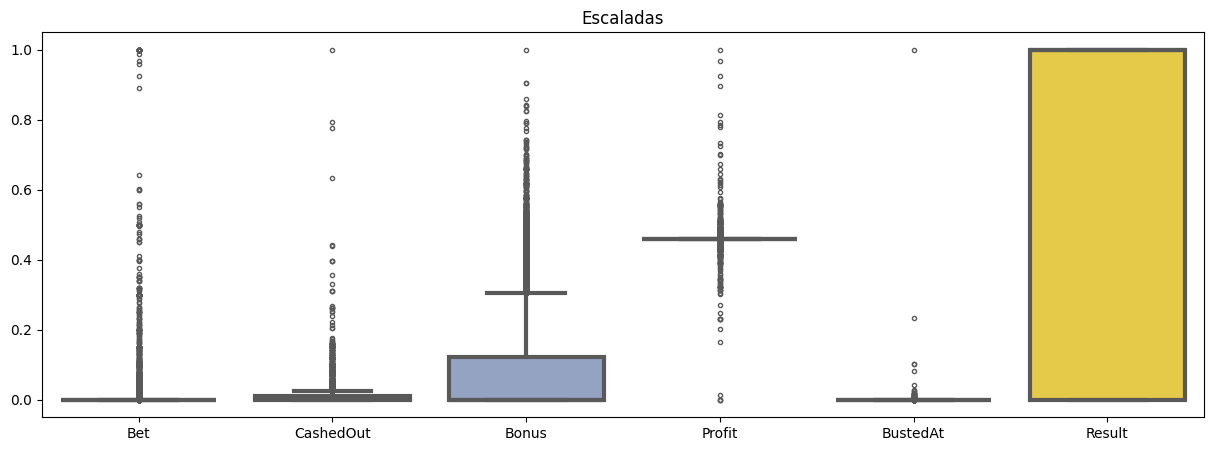

In [51]:
plt.figure(figsize=(15, 5))
sns.boxplot(data = df_escalado, linewidth = 3, palette="Set2", fliersize = 3)
plt.title('Escaladas')
plt.subplots_adjust(wspace=0.5)

In [49]:
#Se identifican las posiciones de los datos atípicos
LOF = LocalOutlierFactor(n_neighbors = 5, algorithm = 'auto', contamination = 'auto', metric = 'euclidean')
# OJO, usar un número de vecinos más cercano con números impares.

Filtrado = LOF.fit_predict(escaladas) # Se realiza la predicción de los datos atípicos

NOF = LOF.negative_outlier_factor_ # Detecta los valores positivos y negativos (residuos). Si los valores son grandes, entonces son valores no atípicos y por lo general, son valores cercanos a -1.
                                   # Si los valores son positivos y grandes y cercanos a 1, entonces son valores atípicos. La opción negative_outlier_dactor_ calcula dichos valores por
                                   # la media de la relación entre la densidad local de una muestra y las de sus vecinos más cercanos.

radio_outiler = (NOF.max() - NOF)/(NOF.max() - NOF.min()) # radio de detección de datos atípicos
ground_truth = np.ones(len(escaladas), dtype = int)
# Se recomienda para luego comparar que datos es o no atípico (genera un vector de 1 o -1)
n_errors = (Filtrado != ground_truth).sum() # número de datos atípicos

In [50]:
print("Detección: ", Filtrado)
print("Factores atípicos negativos: ", NOF)
print("Número de muestras o filas con datos atípicos: ", n_errors)

Detección:  [1 1 1 ... 1 1 1]
Factores atípicos negativos:  [-1.2453087  -1.         -1.1280208  ... -1.         -1.01648643
 -0.95878274]
Número de muestras o filas con datos atípicos:  7517


In [51]:
#Porcentaje de datos atípicos
porcentajeatipicos= 100*n_errors/betdataset.shape[0]
porcentajeatipicos
print(f"El porcentaje de datos atípicos es de {(round(porcentajeatipicos,3))} %")

El porcentaje de datos atípicos es de 15.034 %


In [52]:
df_escalado.to_parquet('../data/processed/analisis_exploratorio.parquet')

In [53]:
df_escaladowithuser.to_parquet('../data/processed/analisis_exploratorio2.parquet')

In [56]:
df_escalado_gb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4149 entries, 0 to 4148
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Usercode   4149 non-null   object 
 1   Bet        4149 non-null   float64
 2   CashedOut  4149 non-null   float64
 3   Bonus      4149 non-null   float64
 4   Profit     4149 non-null   float64
 5   BustedAt   4149 non-null   float64
 6   Result     4149 non-null   float64
dtypes: float64(6), object(1)
memory usage: 227.0+ KB


In [54]:
df_escalado_gb.to_parquet('../data/processed/analisis_exploratorio3.parquet')